# Générateur d'indices pour CodeNames

## Introduction

<b>CodeNames</b> est un jeu de plateau se jouant en 2 équipes de 2 joueurs minimum. 

But : Dans chaque équipe, un espion doit faire deviner à son équipe une liste de mots (appelés Nom de Code) inscrit sur une « carte clé » commune aux deux espions. 

L’équipe qui trouve tous les noms de Code inscrits sur la carte Clé gagne la partie (l’équipe qui commence doit faire deviner 9 mots et l’autre équipe 8).

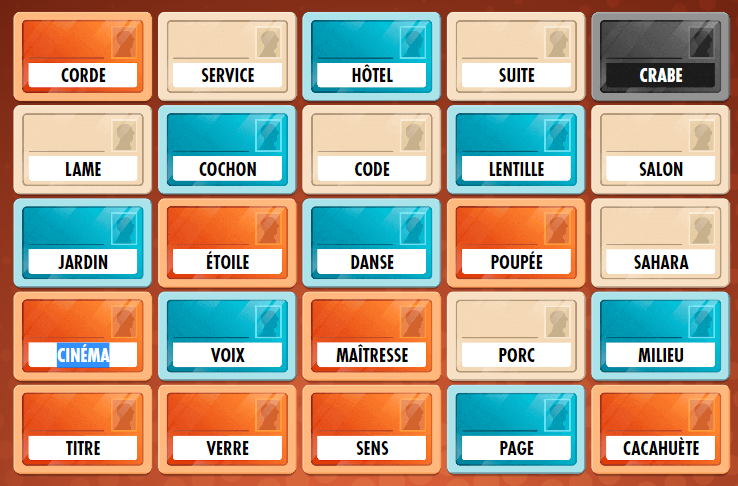

<b>Déroulement :</b> 

L'équipe avec le plus de cartes à deviner commence, ici ce sont les rouges.

Les équipes sont composées d'agents et d'espions, dans le cas où il n'y a que 4 joueurs dans la partie, il y aura donc 1 agent et 1 espion dans chaque équipe.

L'agent voit les cartes mais ne voit pas leur couleur.

L'espion donne un indice suivi d'un chiffre qui va permettre à son agent de deviner les cartes clés associées. Le chiffre lui permet de savoir combien de cartes sont associées au mot donné.

Par exemple l'espion Rouge pourrait proposer <b>FILM 2</b> pour faire deviner les mots <b>CINEMA</b> et <b>TITRE</b>.

Si l'agent découvre une carte alliée (Rouge dans ce cas), il peut continuer à découvrir d'autres cartes jusqu'à un total du nombre d'indice +1. Dans le cas de <b>FILM 2</b> l'agent pourrait découvrir jusqu'à 3 cartes.

Si l'agent découvre une carte adverse (Bleue dans ce cas) ou une carte blanche, il finit son tour, l'espion adverse peut proposer un indice.

Si l'agent découvre la carte assassin (carte noire), la partie est perdu, les adversaires gagnent.

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from gensim.models import KeyedVectors
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Création d'une grille

On récupère dans un premier temps la liste de tous les mots contenus dans Codenames

In [52]:
file = open("codenames.txt", encoding='utf8').readlines()
words = ([s.replace('\n', '') for s in file])
print(words)

['Afrique', 'Aiguille', 'Aile', 'Air', 'Alien', 'Allemagne', 'Alpes', 'Amour', 'Ampoule', 'Amérique', 'Ange', 'Angleterre', 'Anneau', 'Appareil', 'Araignée', 'Arc', 'Argent', 'Asile', 'Astérix', 'Atlantique', 'Atout', 'Australie', 'Avion', 'Avocat', 'Baguette', 'Baie', 'Balance', 'Baleine', 'Balle', 'Ballon', 'Banane', 'Banc', 'Bande', 'Banque', 'Bar', 'Barbe', 'Base', 'Bateau', 'Berlin', 'Bière', 'Blé', 'Bombe', 'Bon', 'Botte', 'Bouche', 'Bouchon', 'Bougie', 'Boulet', 'Bourse', 'Bouteille', 'Bouton', 'Boîte', 'Branche', 'Bretelle', 'Brique', 'Bureau', 'But', 'Bâton', 'Bête', 'Bûche', 'Cabinet', 'Cadre', 'Cafard', 'Café', 'Camembert', 'Campagne', 'Canada', 'Canard', 'Canne', 'Canon', 'Carreau', 'Carrière', 'Carte', 'Carton', 'Cartouche', 'Casino', 'Ceinture', 'Cellule', 'Centre', 'Cercle', 'Champ', 'Champagne', 'Chance', 'Chapeau', 'Charge', 'Charme', 'Chasse', 'Chat', 'Chausson', 'Chaîne', 'Chef', 'Chemise', 'Cheval', 'Chevalier', 'Chien', 'Chine', 'Chocolat', 'Chou', 'Château', 'Ciné

Ensuite on va pouvoir générer notre liste de mots

In [53]:
import random

random.shuffle(words)  # Mélanger la liste de manière aléatoire
words = words[:25]
words = list(map(str.lower,words))


Maintenant on va assigner une couleur à chaque mot

In [54]:
red_words = words[:9]
blue_words = words[9:17]
white_words = words[17:24]
black_words = words[24:25]

print("les mots rouges sont : ",red_words)
print("les mots bleus sont : ",blue_words)
print("les mots blancs sont : ",white_words)
print("le mot noir est : ",black_words)

les mots rouges sont :  ['jungle', 'roi', 'ligne', 'paris', 'anneau', 'papier', 'temps', 'vie', 'magie']
les mots bleus sont :  ['coton', 'docteur', 'café', 'science', 'fin', 'grue', 'ballon', 'terre']
les mots blancs sont :  ['facteur', 'commerce', 'canada', 'amour', 'règle', 'chaîne', 'pingouin']
le mot noir est :  ['bête']


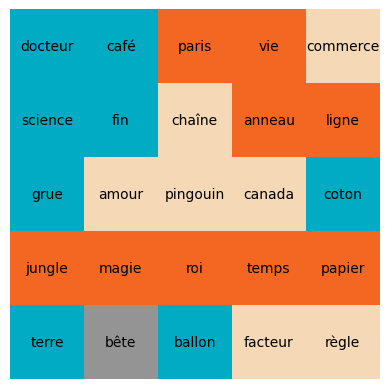

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Création de la grille
grid = np.random.randint(4, size=(5, 5))

# Création du graphique
fig, ax = plt.subplots()

random.shuffle(words)

n=0
# Dessin des rectangles et ajout des labels
for i in range(len(grid)):
    for j in range(len(grid[i])):
        if words[n] in red_words:
            color = "#f36722"
        elif words[n] in blue_words:
            color = "#01abc4"
        elif words[n] in white_words:
            color = "#f5d9b6"
        else :
            color = "#949494"
        rect = plt.Rectangle((j, i), 1, 1, facecolor=color)
        ax.add_patch(rect)
        ax.text(j + 0.5, i + 0.5, words[n], ha='center', va='center')
        n=n+1

# Configuration du graphique
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_aspect('equal')
ax.axis('off')

# Affichage de la grille
plt.show()

Voilà, on peut à présent générer nos propres grilles de codenames, celà va nous être utile pour faire des test randomisés et mieux observer nos IA.

## Développement de l'IA

Pour notre IA nous utiliserons gensim avec un modèle pré entrainé sur la langue francaise. Il est possible d'adapter le jeu dans n'importe quelle langue tant que nous avons une liste de mots disponible et un modèle pré entrainé disponible également.

Le modèle utilisé est disponible ici : https://fauconnier.github.io/#data

In [56]:
# Chemin vers le modèle Word2Vec pré-entraîné
path = "frWac_no_postag_no_phrase_500_cbow_cut100.bin"

# Charger le modèle
model = KeyedVectors.load_word2vec_format(path, binary=True)

# Trouver les 10 mots les plus similaires pour la liste de mots donnée
similar_words = model.most_similar(positive=red_words,negative=blue_words+white_words+black_words, topn=10)

# Afficher les résultats
for word, similarity in similar_words:
    print(word, similarity)

logrus 0.2623951733112335
vous 0.25971972942352295
imprimer 0.2588329613208771
glisser-déposer 0.25590941309928894
photoimpact 0.25186121463775635
personnalisez 0.24895012378692627
personnaliser 0.2486022263765335
magix 0.2471301555633545
trombinoscope 0.24585984647274017
lecteur 0.245827317237854


L'IA nous permet de récupérer les 10 premiers mots qui sont les plus proches avec tout ceux que l'on a à découvrir.

Cette méthode n'est pas forcément la meilleure, les mots sont un peu trop hasardeux et on perd en précision.

On ne peut pas demander à quelqu'un de trouver 8 ou 9 mots d'un coup en un seul indice.


On va chercher une autre méthode

### Méthode n°1

Ici on va essayer d'abord de trouver une corrélation forte entre nos propres mots

Il est plus facile de faire deviner deux ou trois mots qui se ressemblent plutot que donner un indice trop général pour 9 mots qui sont pas vraiment liés

In [57]:
score =[]
for i in range(len(red_words)):
    for j in range(i,len(red_words)):
        if i!=j:
            similarite = model.similarity(red_words[i], red_words[j])
            print(red_words[i],"+",red_words[j],"=",similarite)
            score.append([similarite,red_words[i],red_words[j]])

sorted_scores = sorted(score, key=lambda x: x[0],reverse = True)
print(sorted_scores)

jungle + roi = 0.13952897
jungle + ligne = -0.02818653
jungle + paris = -0.013470091
jungle + anneau = 0.10906352
jungle + papier = 0.0056710723
jungle + temps = -0.0028969315
jungle + vie = 0.09596806
jungle + magie = 0.16752209
roi + ligne = -0.18150073
roi + paris = 0.10793348
roi + anneau = 0.19125536
roi + papier = -0.0879683
roi + temps = -0.063888095
roi + vie = 0.007939866
roi + magie = 0.12594672
ligne + paris = 0.103741944
ligne + anneau = 0.03959373
ligne + papier = 0.243524
ligne + temps = -0.028356832
ligne + vie = -0.21957524
ligne + magie = -0.056937523
paris + anneau = -0.118908994
paris + papier = -0.06716664
paris + temps = -0.31393737
paris + vie = -0.118815035
paris + magie = -0.080751866
anneau + papier = 0.07703803
anneau + temps = 0.033312365
anneau + vie = -0.0568326
anneau + magie = 0.2126346
papier + temps = 0.0064826664
papier + vie = -0.15319154
papier + magie = 0.053491466
temps + vie = 0.29720768
temps + magie = 0.0762867
vie + magie = 0.17229882
[[0.29720

Maintenant nous avons les couples de mots les plus ressemblants avec leur scores respectifs.

On va pouvoir filtrer un peu tout ca et retirer ceux qui ne vont pas du tout ensemble.

On peut soit retirer les éléments en fonction d'un seuil, ici 0.12, soit les retirer en fonction du nombre de résultats que l'on veut garder (par exemple: les 5 premiers). 

In [58]:
sorted_scores = [element for element in sorted_scores if element[0] >= 0.12]
print(sorted_scores)

[[0.29720768, 'temps', 'vie'], [0.243524, 'ligne', 'papier'], [0.2126346, 'anneau', 'magie'], [0.19125536, 'roi', 'anneau'], [0.17229882, 'vie', 'magie'], [0.16752209, 'jungle', 'magie'], [0.13952897, 'jungle', 'roi'], [0.12594672, 'roi', 'magie']]


In [59]:
score =[]
for i in range(len(sorted_scores)):
    for j in range(len(red_words)):
        if red_words[j] not in sorted_scores[i][1:]:
            similarite = model.n_similarity(sorted_scores[i][1:], red_words[j])
            words=[]
            for word in sorted_scores[i][1:]:
                words.append(word)
            words.append(red_words[j])
            score.append([similarite,words])
                          
sorted_scores.append(sorted(score, key=lambda x: x[0],reverse = True))
print(sorted_scores)

[[0.29720768, 'temps', 'vie'], [0.243524, 'ligne', 'papier'], [0.2126346, 'anneau', 'magie'], [0.19125536, 'roi', 'anneau'], [0.17229882, 'vie', 'magie'], [0.16752209, 'jungle', 'magie'], [0.13952897, 'jungle', 'roi'], [0.12594672, 'roi', 'magie'], [[0.11783182, ['roi', 'anneau', 'vie']], [0.09366366, ['roi', 'anneau', 'temps']], [0.09181033, ['roi', 'anneau', 'magie']], [0.078337505, ['ligne', 'papier', 'anneau']], [0.07825465, ['ligne', 'papier', 'temps']], [0.07707752, ['ligne', 'papier', 'magie']], [0.07561393, ['roi', 'anneau', 'papier']], [0.07002719, ['ligne', 'papier', 'vie']], [0.06984041, ['ligne', 'papier', 'paris']], [0.063188665, ['anneau', 'magie', 'temps']], [0.06270504, ['roi', 'anneau', 'ligne']], [0.062215395, ['roi', 'anneau', 'paris']], [0.058633264, ['roi', 'anneau', 'jungle']], [0.040877994, ['roi', 'magie', 'vie']], [0.038168848, ['jungle', 'roi', 'vie']], [0.033389267, ['ligne', 'papier', 'jungle']], [0.024080668, ['anneau', 'magie', 'papier']], [0.022342889, ['

Maintenant nous avons agrandi nos possibilités à 3 mots à trouver pour l'indice donné. On remarque que plus le nombre de mots à trouver est élevé, plus le score a tendance à être faible, c'est normal.

On pourrait essayer de rectifier ca en mettant un coefficient multiplicateur sur le score pour que l'IA prenne plus de risques et qu'elle essaie de faire deviner plus de mots d'un coup.

Mais pour l'instant nous allons se concentrer sur la proposition d'indice.


In [60]:
model.most_similar(positive=red_words,negative=blue_words+white_words+black_words, topn=10)

[('logrus', 0.2623951733112335),
 ('vous', 0.25971972942352295),
 ('imprimer', 0.2588329613208771),
 ('glisser-déposer', 0.25590941309928894),
 ('photoimpact', 0.25186121463775635),
 ('personnalisez', 0.24895012378692627),
 ('personnaliser', 0.2486022263765335),
 ('magix', 0.2471301555633545),
 ('trombinoscope', 0.24585984647274017),
 ('lecteur', 0.245827317237854)]

Au début du projet nous avions cette fonction qui nous permettait d'avoir une liste d'indice mais rien de très pertinent, essayons avec notre nouvelle méthode.

In [61]:
resultats = model.most_similar(positive=sorted_scores[0][1:],negative=blue_words+white_words+black_words, topn=10)

resultats = [mot[0] for mot in resultats]

print("L'IA propose ",resultats[0] ,len(sorted_scores[0][1:])," pour trouver les mots :",sorted_scores[0][1:])

L'IA propose  souhaiter 2  pour trouver les mots : ['temps', 'vie']


On voit ici que l'IA arrive assez souvent à nous faire deviner 2 ou 3 mots avec un seul indice.
Comment améliorer cette IA ?

## A votre tour : 